#  **MiTiempo - Comfachocó** #
##**Más tiempo para lo que realmente importa**

**Simulador de autogestion de vacaciones y permisos**

**Objetivo:** Desarrollar un Producto Mínimo Viable (MVP) de una aplicación web orientada a la autogestión de vacaciones y permisos, que en un plazo de ocho semanas permita a los empleados de Comfachocó realizar solicitudes en menos de dos minutos y a los supervisores aprobarlas con un solo clic.

**NOTEBOOK UNIFICADO**

Incluye:
  * Generación del dataset
  * Exportación del CSV
  * EDA completo
  * Predicción de modelos de ML

#  Paso 1 - Importar librerías

En esta celda se importan todas las librerías necesarias para la generación, análisis y modelado del dataset sintético. A continuación se describen sus funciones principales.

---

##  Librerías para manejo de datos

| Librería | Uso principal |
|----------|---------------|
| `pandas` (`pd`) | Manipulación de datos tabulares (DataFrames), lectura/escritura de CSV, filtrado y agregaciones. |
| `numpy` (`np`) | Operaciones numéricas, generación de números aleatorios, arrays y cálculos matemáticos. |

---

##  Librerías para visualización

| Librería | Uso principal |
|----------|---------------|
| `seaborn` (`sns`) | Visualizaciones estadísticas avanzadas: gráficos de distribución, correlación, boxplots y heatmaps. |
| `matplotlib.pyplot` (`plt`) | Visualización básica, personalización de gráficos, figuras y leyendas. |
| `WordCloud` | Generación de nubes de palabras a partir de texto (para análisis de motivos o justificaciones). |

> Se configuran opciones de estilo y tamaño de figuras para que los gráficos sean claros y consistentes:  
> ```python
> sns.set(style="whitegrid")
> plt.rcParams["figure.figsize"] = (12,6)
> ```

---

##  Librerías para Machine Learning (scikit-learn)

| Módulo | Uso principal |
|--------|---------------|
| `train_test_split` | División de datos en conjuntos de entrenamiento y prueba. |
| `CountVectorizer` | Conversión de texto en matrices de conteo (para NLP). |
| `LabelEncoder` | Codificación de variables categóricas en números. |
| `StandardScaler` | Normalización y escalado de variables numéricas. |
| `MultinomialNB` | Modelo Naive Bayes para clasificación de texto. |
| `OneClassSVM` | Detección de anomalías. |
| `LinearRegression` | Regresión lineal para predicción de valores continuos. |
| `LogisticRegression` | Clasificación binaria o multiclase. |
| `DecisionTreeClassifier` | Clasificación basada en árboles de decisión. |
| `KMeans` | Clustering no supervisado para segmentación de empleados. |
| `KNeighborsRegressor` | Regresión basada en vecinos más cercanos (KNN). |

---

##  Librerías para almacenamiento y warnings

| Librería | Uso principal |
|----------|---------------|
| `joblib` | Guardar y cargar modelos de ML entrenados de forma eficiente. |
| `warnings` | Control de advertencias, se configura para ignorarlas durante la ejecución:  
`warnings.filterwarnings("ignore")` |

---

###  Resumen
Esta celda prepara todo el entorno para:

1. Crear y manipular datasets sintéticos.  
2. Realizar análisis exploratorio y visualizaciones.  
3. Entrenar, evaluar y guardar modelos de Machine Learning.  
4. Ejecutar notebooks sin advertencias innecesarias y con gráficos consistentes.


In [22]:
# ============================================================
#
#               Paso 1 - Importar librerias
#
# ============================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from textwrap import dedent
from scipy.stats import skew, kurtosis

import joblib
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# Documentación del Dataset Sintético – Proyecto Mi Tiempo / Comfachocó

##  1. Objetivo del Dataset
Este dataset sintético simula **solicitudes de permisos y licencias de empleados** dentro de una empresa, permitiendo:

- Entrenar modelos de **Machine Learning supervisados** para predecir aprobaciones, rechazos o revisiones de RRHH.  
- Analizar patrones de solicitud por **motivo, categoría, antigüedad y área**.  
- Evaluar el **impacto operativo** de ausencias en las distintas áreas.  
- Servir como base para **asistentes inteligentes** o sistemas de autogestión de personal.  

> El dataset está diseñado para ser **realista, coherente y reproducible**.

---

##  2. Tamaño y estructura
- **Número de registros (N):** 1500  
- **Variables principales:**

| Variable | Tipo | Descripción |
|----------|------|-------------|
| `empleado_id` | Entero | Identificador único del empleado |
| `edad` | Entero | Edad del empleado (18–64 años) |
| `area` | Categórica | Área de la empresa a la que pertenece el empleado |
| `antiguedad_anios` | Flotante | Años de antigüedad del empleado en el área |
| `motivo_texto` | Texto | Motivo específico de la solicitud |
| `tipo_permiso_real` | Categórica | Categoría general del permiso (Salud, Familiar, Vacaciones, Académico, Licencias, Judicial, Laboral, Personal, Otros) |
| `dias_solicitados` | Entero | Número de días solicitados para el permiso |
| `dias_ult_ano` | Entero | Número de días que el empleado solicitó el año anterior |
| `impacto_area` | Flotante | Indicador sintético del impacto de la ausencia en el área (0–100) |
| `resultado_rrhh` | Categórica | Resultado de la solicitud: Aprobado, Rechazado o Revisar |

---

##  3. Detalles de las variables

### 3.1 Motivo y categoría
- Se utilizaron **35 motivos realistas**, basados en situaciones habituales de empresas.  
- Cada motivo está asignado a una categoría profesional, que permite análisis agrupado y predicciones coherentes.  

**Ejemplos:**  
- `"Cita médica"` → `"Salud"`  
- `"Licencia de maternidad"` → `"Licencias"`  
- `"Trámite bancario"` → `"Personal"`  

---

### 3.2 Días solicitados
- Cada motivo tiene un **rango de días realista**, que refleja políticas laborales y prácticas de RRHH.  
- Ejemplo: Vacaciones 5–15 días, Licencia de maternidad 30–90 días, Cita médica 1–2 días.  
- Permite que el modelo aprenda **relaciones significativas** entre motivo, días y resultado.

---

### 3.3 Impacto en el área
- Calculado como combinación de:  
  1. Días solicitados  
  2. Historial de días del último año  
  3. Antigüedad del empleado  
- Valor ajustado entre 0 y 100.  
- Refleja la **carga operativa** de cada solicitud y sirve como feature para modelos predictivos.

---

### 3.4 Resultado de RRHH
- Variable objetivo del dataset.  
- La probabilidad de cada clase (`Aprobado`, `Rechazado`, `Revisar`) se calcula en función del **motivo, días solicitados e impacto**, de manera estocástica.  
- Permite entrenar modelos **multiclase** con comportamiento realista.

---

## 4. Aplicaciones del dataset
1. **Modelos supervisados de clasificación:** Predecir si una solicitud será aprobada, rechazada o revisada.  
2. **Análisis exploratorio y visualización:** Impacto de ausencias por área y distribución de motivos y categorías.  
3. **Simulación y prueba de sistemas inteligentes:** Asistentes de RRHH, evaluación de cargas operativas, planificación de recursos.  
4. **Pruebas de NLP:** Clasificación automática de motivo_texto o generación de justificaciones.

---

##  5. Características del dataset
- **Reproducible:** `np.random.seed(42)` asegura consistencia entre ejecuciones.  
- **Coherente:** Valores de días, motivos y categorías alineados con prácticas laborales reales.  
- **Flexible:** Permite agregar más empleados, motivos o categorías fácilmente.  
- **Multiclase:** Entrenamiento de modelos con más de dos categorías (Aprobado / Rechazado / Revisar).

---

##  6. Consideraciones adicionales
- Este dataset es **sintético** y **no contiene datos personales reales**.  
- Diseñado para **experimentos de Machine Learning y análisis de RRHH**.  
- Adecuado para crear **simuladores, prototipos de asistentes y dashboards de gestión de permisos**.


In [10]:
# ============================================================
#
#               Paso 2 - Generar el DATASET sintético
#
# ============================================================

np.random.seed(42)
N = 1500

# ============================================================
# 1. Información base del empleado
# ============================================================

empleado_id = np.arange(1, N+1)
edad = np.random.randint(18, 65, N)

areas = ["Administrativa", "Operativa", "Comercial", "Financiera", "Tecnologia", "Talento Humano"]
area = np.random.choice(areas, N)

antiguedad_media = {
    "Administrativa": 6,
    "Operativa": 4,
    "Comercial": 3,
    "Financiera": 7,
    "Tecnologia": 2,
    "Talento Humano": 5
}

# Antigüedad realista
antiguedad_anios = np.array([
    max(0, np.random.normal(antiguedad_media[a], 2.5))
    for a in area
])

# ============================================================
# 2. Motivos y categorías
# ============================================================

motivos = [
    # Salud
    "Cita médica", "Terapia o rehabilitación", "Incapacidad por enfermedad",
    "Incapacidad por accidente laboral", "Acompañamiento médico a familiar",

    # Familiar / Calamidad
    "Calamidad doméstica", "Emergencia familiar", "Hospitalización de familiar",
    "Fallecimiento de familiar", "Cuidado temporal de familiar",

    # Trámites personales
    "Trámite bancario", "Cita gubernamental", "Notaría", "Trámite de documentos",
    "Mudanza",

    # Académico
    "Estudio", "Examen académico", "Curso o capacitación", "Certificación profesional",

    # Vacaciones / descanso
    "Vacaciones", "Compensación en tiempo", "Día libre por convenio",

    # Licencias
    "Licencia de maternidad", "Licencia de paternidad", "Cita prenatal",
    "Complicación de embarazo",

    # Judicial
    "Citación judicial", "Citación policial",

    # Laboral
    "Reunión externa", "Actividad sindical", "Teletrabajo excepcional",

    # Otros
    "Problemas personales", "Imprevisto urgente"
]

motivo_texto = np.random.choice(motivos, N)

# Categorías profesionales
tipo_map = {
    # Salud
    "Cita médica": "Salud",
    "Terapia o rehabilitación": "Salud",
    "Incapacidad por enfermedad": "Salud",
    "Incapacidad por accidente laboral": "Salud",
    "Acompañamiento médico a familiar": "Salud",

    # Familiar
    "Calamidad doméstica": "Familiar",
    "Emergencia familiar": "Familiar",
    "Hospitalización de familiar": "Familiar",
    "Fallecimiento de familiar": "Familiar",
    "Cuidado temporal de familiar": "Familiar",

    # Personal / administrativo
    "Trámite bancario": "Personal",
    "Cita gubernamental": "Personal",
    "Notaría": "Personal",
    "Trámite de documentos": "Personal",
    "Mudanza": "Personal",

    # Académico
    "Estudio": "Académico",
    "Examen académico": "Académico",
    "Curso o capacitación": "Académico",
    "Certificación profesional": "Académico",

    # Vacaciones / descanso
    "Vacaciones": "Vacaciones",
    "Compensación en tiempo": "Vacaciones",
    "Día libre por convenio": "Vacaciones",

    # Licencias
    "Licencia de maternidad": "Licencias",
    "Licencia de paternidad": "Licencias",
    "Cita prenatal": "Licencias",
    "Complicación de embarazo": "Licencias",

    # Judicial
    "Citación judicial": "Judicial",
    "Citación policial": "Judicial",

    # Laborales
    "Reunión externa": "Laboral",
    "Actividad sindical": "Laboral",
    "Teletrabajo excepcional": "Laboral",

    # Otros
    "Problemas personales": "Otros",
    "Imprevisto urgente": "Otros"
}

tipo_permiso_real = [tipo_map[m] for m in motivo_texto]

# ============================================================
# 3. Rango realista de días según motivo
# ============================================================

dias_map = {
    # Salud
    "Cita médica": (1, 2),
    "Terapia o rehabilitación": (1, 3),
    "Incapacidad por enfermedad": (2, 15),
    "Incapacidad por accidente laboral": (3, 20),
    "Acompañamiento médico a familiar": (1, 3),

    # Familiar
    "Calamidad doméstica": (2, 5),
    "Emergencia familiar": (1, 4),
    "Hospitalización de familiar": (2, 7),
    "Fallecimiento de familiar": (3, 7),
    "Cuidado temporal de familiar": (1, 5),

    # Personal
    "Trámite bancario": (1, 1),
    "Cita gubernamental": (1, 2),
    "Notaría": (1, 1),
    "Trámite de documentos": (1, 2),
    "Mudanza": (1, 2),

    # Académico
    "Estudio": (2, 10),
    "Examen académico": (1, 3),
    "Curso o capacitación": (1, 5),
    "Certificación profesional": (1, 7),

    # Vacaciones
    "Vacaciones": (5, 15),
    "Compensación en tiempo": (1, 3),
    "Día libre por convenio": (1, 1),

    # Licencias
    "Licencia de maternidad": (30, 90),
    "Licencia de paternidad": (5, 15),
    "Cita prenatal": (1, 2),
    "Complicación de embarazo": (3, 10),

    # Judicial
    "Citación judicial": (1, 3),
    "Citación policial": (1, 2),

    # Laboral
    "Reunión externa": (1, 2),
    "Actividad sindical": (1, 3),
    "Teletrabajo excepcional": (1, 2),

    # Otros
    "Problemas personales": (1, 4),
    "Imprevisto urgente": (1, 2)
}

dias_solicitados = np.array([
    np.random.randint(dias_map[m][0], dias_map[m][1] + 1)
    for m in motivo_texto
])

# ============================================================
# 4. Historial del empleado + impacto en el área
# ============================================================

dias_ult_ano = np.random.randint(0, 20, N)

impacto_area = (
    dias_solicitados * np.random.uniform(1.1, 2.3, N)
    + dias_ult_ano * 0.25
    - antiguedad_anios * 0.15
)

impacto_area = np.clip(impacto_area, 0, 100)

# ============================================================
# 5. Probabilidad realista de aprobación
# ============================================================

def prob_aprobacion(motivo, dias, impacto):
    """
    Asigna probabilidad de aprobación según:
    - tipo de permiso
    - días solicitados
    - impacto en el área
    """

    # Penaliza impactos altos
    base = 0.8 - (impacto / 200)

    # Penalización por días extremos
    if dias > 10:
        base -= 0.15

    # Permisos naturalmente aprobados
    if motivo in ["Cita médica", "Terapia o rehabilitación", "Cita prenatal"]:
        base += 0.15

    # Permisos sensibles siempre aprobados
    if motivo in ["Licencia de maternidad", "Licencia de paternidad"]:
        base = 0.95

    return np.clip(base, 0.05, 0.95)

probs = np.array([
    prob_aprobacion(motivo_texto[i], dias_solicitados[i], impacto_area[i])
    for i in range(N)
])

resultado_rrhh = np.array([
    np.random.choice(["Aprobado", "Rechazado", "Revisar"],
                     p=[probs[i], (1 - probs[i]) * 0.5, (1 - probs[i]) * 0.5])
    for i in range(N)
])
print("✔ Dataset generado")

✔ Dataset generado


#  Paso 3 - Crear el DataFrame Final y exportar CSV

En este paso se consolidan todas las variables generadas en las celdas anteriores en un **DataFrame único**, llamado `df`, que representa el dataset completo de empleados y solicitudes. Este DataFrame servirá como base para análisis exploratorio, visualización y entrenamiento de modelos de Machine Learning.

---

##  Construcción del DataFrame

Se agrupan las siguientes variables:

| Variable | Descripción |
|----------|-------------|
| `empleado_id` | Identificador único de cada empleado |
| `edad` | Edad del empleado (18–64 años) |
| `area` | Área de la empresa a la que pertenece el empleado |
| `antiguedad_anios` | Años de antigüedad del empleado en el área |
| `dias_ult_ano` | Número de días solicitados por el empleado en el último año |
| `dias_solicitados` | Número de días solicitados en la solicitud actual |
| `motivo_texto` | Motivo específico de la solicitud |
| `tipo_permiso_real` | Categoría general del permiso (Salud, Familiar, Vacaciones, Académico, Licencias, Judicial, Laboral, Personal, Otros) |
| `impacto_area` | Indicador sintético del impacto de la ausencia en el área (0–100) |
| `resultado_rrhh` | Resultado de la solicitud: Aprobado, Rechazado o Revisar |

El DataFrame se crea con todas estas columnas de manera tabular, lo que permite trabajar con la información de manera coherente y organizada para análisis, visualizaciones y preparación de datos para Machine Learning.

In [14]:
# ============================================================
#
#               Paso 3 - Crear el DATAFRAME FINAL
#
# ============================================================

df = pd.DataFrame({
    "empleado_id": empleado_id,
    "edad": edad,
    "area": area,
    "antiguedad_anios": antiguedad_anios,
    "dias_ult_ano": dias_ult_ano,
    "dias_solicitados": dias_solicitados,
    "motivo_texto": motivo_texto,
    "tipo_permiso_real": tipo_permiso_real,
    "impacto_area": impacto_area,
    "resultado_rrhh": resultado_rrhh
})

df.to_csv("empleados_master.csv", index=False)
print("✔ Dataset creado: empleados_master.csv")

✔ Dataset creado: empleados_master.csv


#  Paso 4 - Análisis Exploratorio de Datos (EDA)

En este paso se realiza un **análisis inicial del dataset** `df` para comprender la distribución de variables, detectar outliers, identificar correlaciones y explorar la frecuencia de categorías. El EDA es fundamental para preparar los datos antes de cualquier modelo de Machine Learning.

---

##  Información general del dataset
- `df.info()` permite ver:
  - Número de registros y columnas
  - Tipos de datos
  - Valores nulos por columna
- `df.describe()` proporciona estadísticas descriptivas de las variables numéricas:
  - Media, mediana, desviación estándar, mínimo, máximo y percentiles

---

##  Histogramas
- Se grafican las distribuciones de variables numéricas:  
  `["edad", "antiguedad_anios", "dias_ult_ano", "dias_solicitados", "impacto_area"]`  
- Permiten observar:
  - Distribución de cada variable
  - Asimetrías
  - Concentración de valores
- Configuración: 20 bins, color azul cielo, tamaño de figura (16,10)

---

##  Box Plots
- Se grafican las mismas variables numéricas en un **diagrama de cajas** para:
  - Detectar outliers o valores extremos
  - Visualizar rangos intercuartílicos y mediana
- Paleta de colores pastel, figura (16,6)

---

##  Matriz de correlación
- Se calcula la **correlación entre variables numéricas** para:
  - Identificar relaciones lineales fuertes o débiles
  - Seleccionar variables para modelos predictivos
- Se utiliza `sns.heatmap` con anotaciones y cmap "Blues"

---

##  Frecuencia de variables categóricas
- Variables categóricas analizadas:  
  `["area", "motivo_texto", "tipo_permiso_real", "resultado_rrhh"]`
- Gráficos de barras (`countplot`) muestran:
  - Cantidad de registros por categoría
  - Distribución de permisos, motivos y resultados de RRHH
- Se rota el eje X 45° para mejor lectura

---

##  WordCloud
- Se genera una **nube de palabras** con la columna `motivo_texto` para:
  - Visualizar motivos de permisos más frecuentes
  - Detectar patrones en las solicitudes de manera visual
- Tamaño de figura (12,6), fondo blanco, interpolación bilinear

---

##  Resumen
- Este análisis permite:
  - Conocer la estructura y calidad del dataset
  - Detectar anomalías y outliers
  - Visualizar distribución de variables numéricas y categóricas
  - Preparar features para Machine Learning
- El EDA finaliza con la confirmación: `🎉 EDA COMPLETO FINALIZADO`



=== INFO DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   empleado_id        1500 non-null   int64  
 1   edad               1500 non-null   int64  
 2   area               1500 non-null   object 
 3   antiguedad_anios   1500 non-null   float64
 4   dias_ult_ano       1500 non-null   int64  
 5   dias_solicitados   1500 non-null   int64  
 6   motivo_texto       1500 non-null   object 
 7   tipo_permiso_real  1500 non-null   object 
 8   impacto_area       1500 non-null   float64
 9   resultado_rrhh     1500 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 117.3+ KB
None

=== DESCRIPCIÓN ESTADÍSTICA ===


,empleado_id,edad,antiguedad_anios,dias_ult_ano,dias_solicitados,impacto_area
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,41.285333,4.618571,9.590000,5.708000,10.569590
std,433.157015,13.480495,2.826580,5.694399,12.147364,16.790596
min,1.000000,18.000000,0.000000,0.000000,1.000000,0.210561
25%,375.750000,29.000000,2.513125,5.000000,1.000000,3.764606
50%,750.500000,42.000000,4.604776,10.000000,2.000000,5.781489
75%,1125.250000,53.000000,6.453584,14.000000,5.000000,9.666622
max,1500.000000,64.000000,13.732584,19.000000,90.000000,100.000000


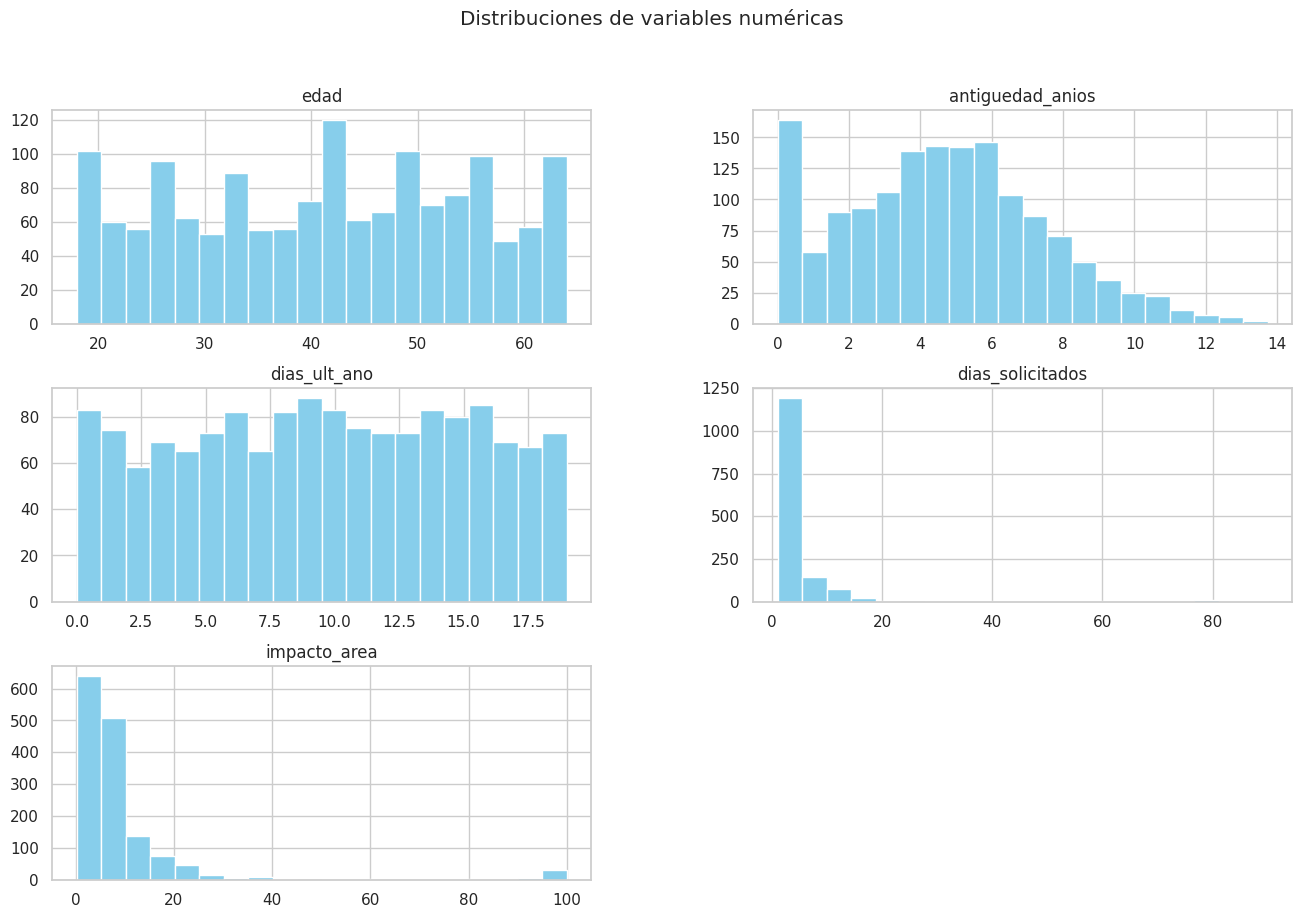

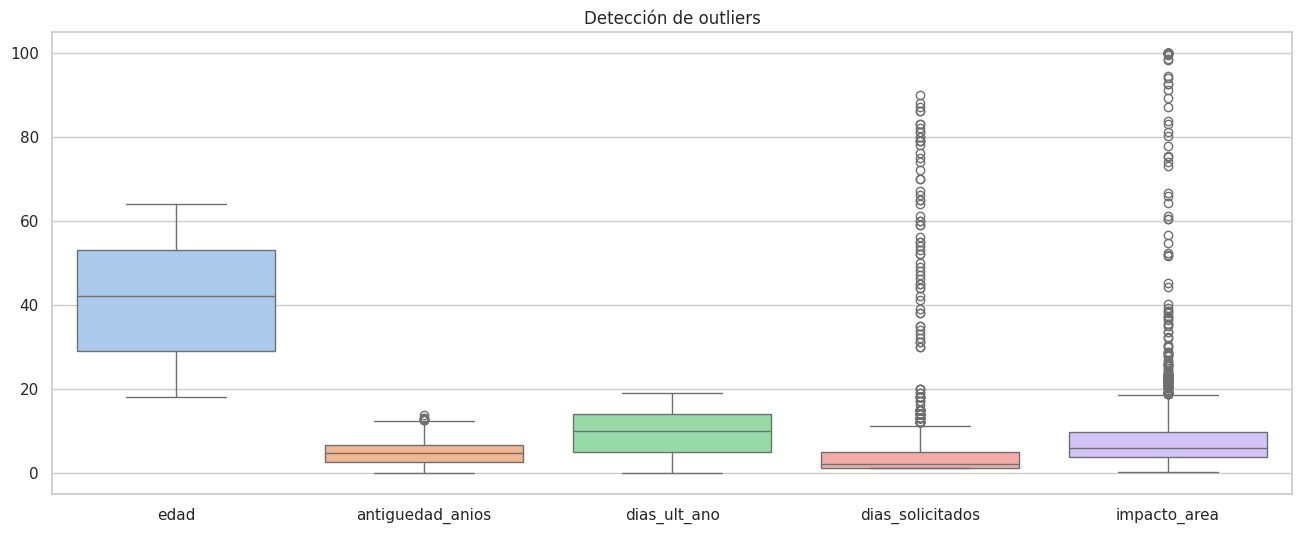

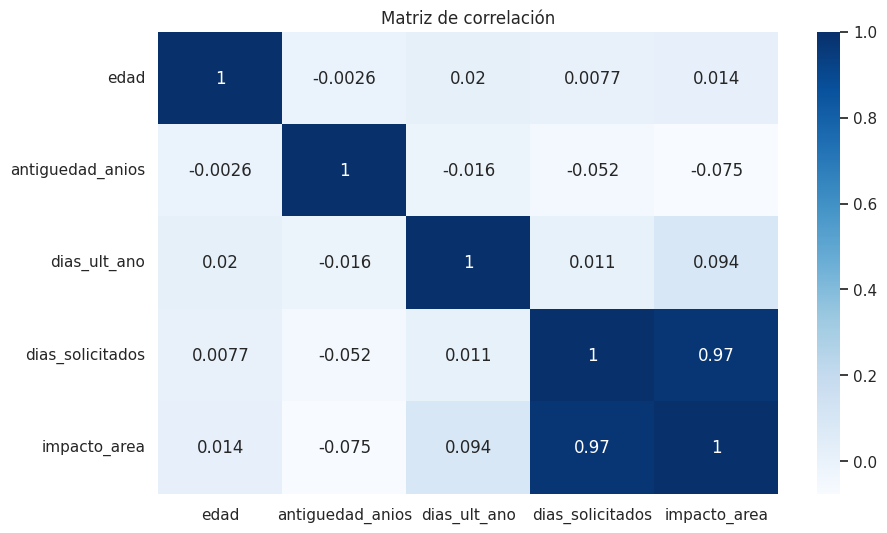

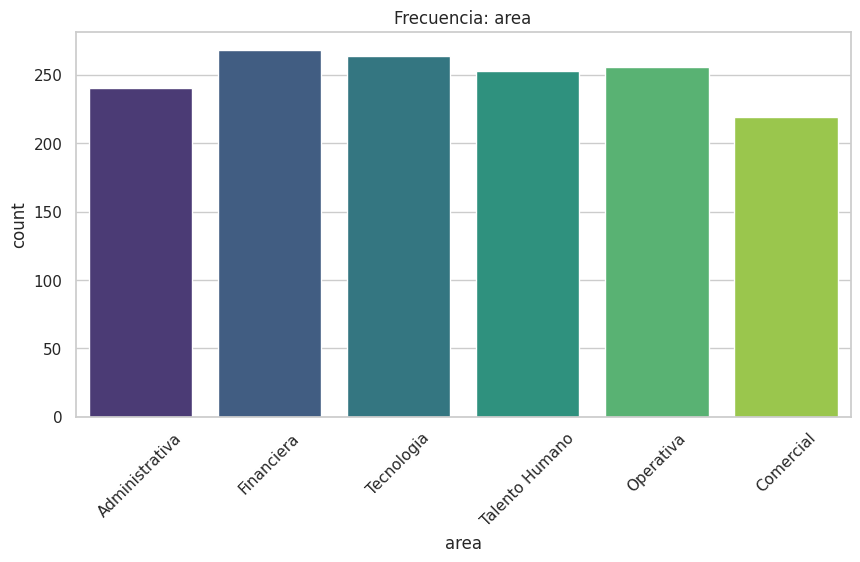

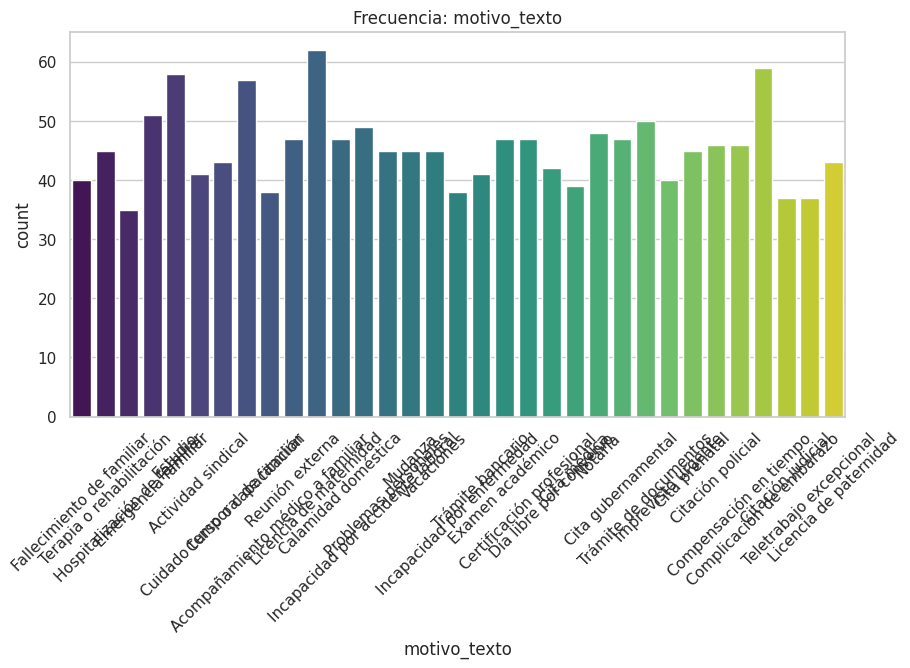

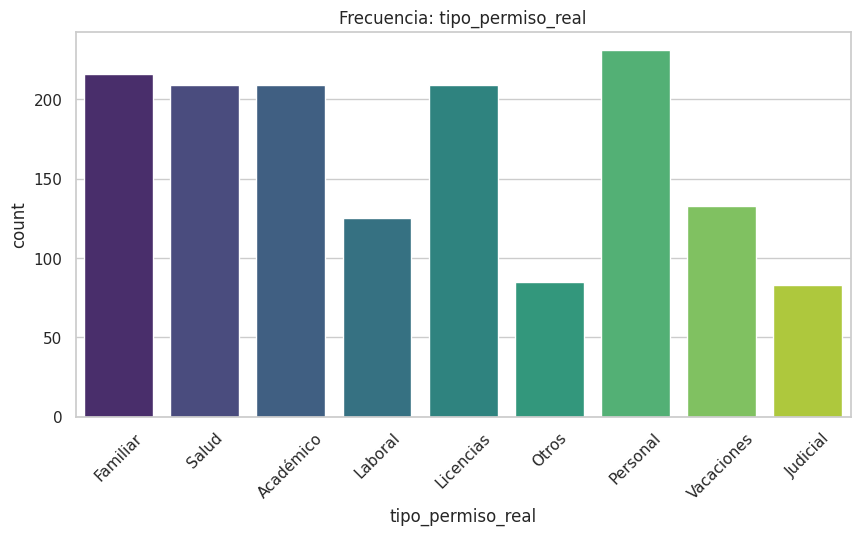

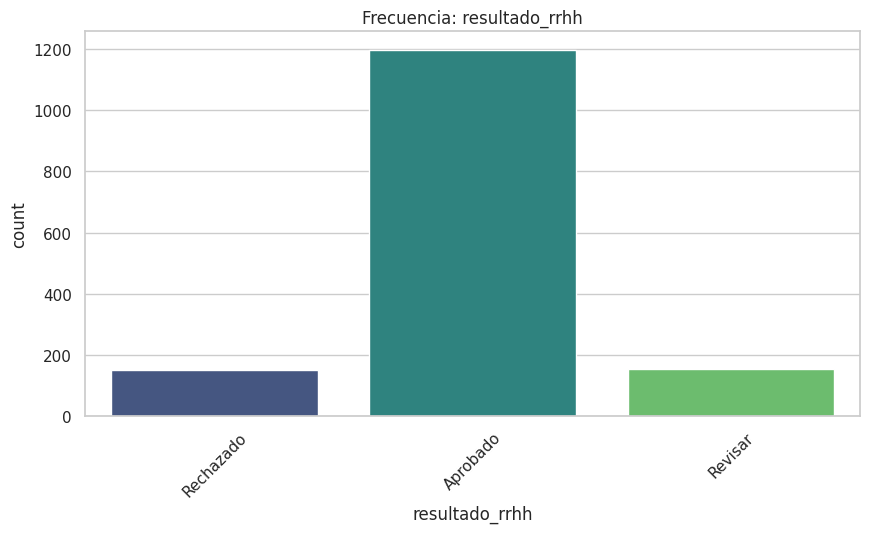

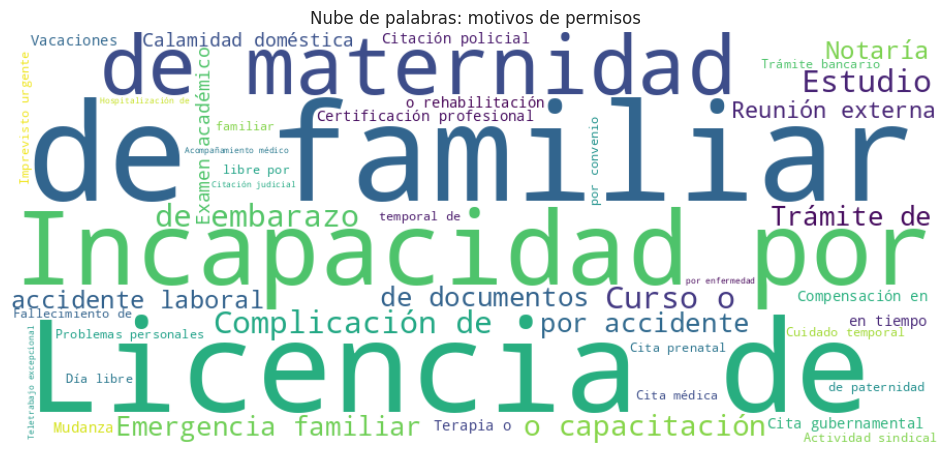


🎉 EDA COMPLETO FINALIZADO



In [13]:
# ============================================================
#
#               Paso 4 - Análisis de datos EDA
#
# ============================================================

print("\n=== INFO DEL DATASET ===")
print(df.info())

print("\n=== DESCRIPCIÓN ESTADÍSTICA ===")
display(df.describe())

# ------------------------------------------------------------
# HISTOGRAMAS
# ------------------------------------------------------------
num_cols = ["edad","antiguedad_anios","dias_ult_ano","dias_solicitados","impacto_area"]

df[num_cols].hist(bins=20, figsize=(16,10), color="skyblue")
plt.suptitle("Distribuciones de variables numéricas")
plt.show()

# ------------------------------------------------------------
# BOX PLOTS
# ------------------------------------------------------------
plt.figure(figsize=(16,6))
sns.boxplot(data=df[num_cols], palette="pastel")
plt.title("Detección de outliers")
plt.show()

# ------------------------------------------------------------
# MATRIZ DE CORRELACIÓN
# ------------------------------------------------------------
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="Blues")
plt.title("Matriz de correlación")
plt.show()

# ------------------------------------------------------------
# FRECUENCIA DE VARIABLES CATEGÓRICAS
# ------------------------------------------------------------
cat_cols = ["area","motivo_texto","tipo_permiso_real","resultado_rrhh"]

for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f"Frecuencia: {col}")
    plt.xticks(rotation=45)
    plt.show()

# ------------------------------------------------------------
# WORDCLOUD
# ------------------------------------------------------------
wc = WordCloud(width=900, height=400, background_color="white").generate(" ".join(df["motivo_texto"]))
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras: motivos de permisos")
plt.show()

print("\n🎉 EDA COMPLETO FINALIZADO\n")


#  Paso 5 - Generación automática de informe de EDA

En este paso se crea un **informe textual automático** basado en los cálculos y métricas obtenidas durante el análisis exploratorio de datos (EDA). La celda realiza operaciones que resumen la información del dataset y facilitan la interpretación de los resultados.

---

##  Qué hace la celda

1. **Resumen general del dataset**
   - Calcula la cantidad de registros y columnas.
   - Detecta valores nulos en todo el DataFrame.
   - Permite tener un panorama rápido de la estructura y calidad de los datos.

2. **Estadísticas descriptivas de variables numéricas**
   - Para cada columna numérica se obtiene:
     - Mínimo y máximo
     - Media y mediana
     - Desviación estándar
   - Esto ayuda a entender la distribución y rango de los valores.

3. **Detección de outliers**
   - Identifica valores extremos usando percentiles (por ejemplo, 1% y 99%).
   - Sirve para resaltar registros que podrían necesitar atención o análisis adicional.

4. **Correlaciones entre variables**
   - Calcula la correlación entre variables numéricas.
   - Resume cuáles son las relaciones más fuertes entre columnas, lo que puede orientar análisis posteriores o selección de variables.

5. **Resumen de variables categóricas**
   - Identifica la categoría más frecuente en cada columna categórica.
   - Permite observar patrones de concentración o distribución de los datos.

6. **Generación de conclusiones preliminares**
   - Combina toda la información calculada en un texto estructurado.
   - Facilita la interpretación rápida del dataset y sirve como base para reportes o documentación.

---

##  Propósito general

La celda permite **automatizar la creación de un informe EDA** en formato textual, evitando la necesidad de redactar observaciones manualmente. Este informe sirve para:

- Revisar rápidamente la calidad y estructura de los datos.
- Identificar patrones, correlaciones y valores atípicos.
- Documentar el análisis exploratorio de manera reproducible y profesional.


In [20]:
# ============================================================
#
#               Paso 5 - Informe del Análisis de datos EDA
#
# ============================================================

def generar_informe_completo(df):
    informe = []

    # Información general
    n_registros, n_cols = df.shape
    informe.append(f"Dataset con {n_registros} registros y {n_cols} columnas.")
    nulos = df.isnull().sum().sum()
    informe.append(f"Total de valores nulos: {nulos}\n")

    # Estadísticas y patrones de variables numéricas
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    if num_cols:
        informe.append("Estadísticas y patrones de variables numéricas:")
        for col in num_cols:
            min_val = df[col].min()
            max_val = df[col].max()
            mean_val = df[col].mean()
            median_val = df[col].median()
            std_val = df[col].std()
            skew_val = skew(df[col])
            kurt_val = kurtosis(df[col])

            informe.append(f"- {col}: min={min_val}, max={max_val}, media={mean_val:.2f}, mediana={median_val}, std={std_val:.2f}, sesgo={skew_val:.2f}, curtosis={kurt_val:.2f}")

            # Sesgo
            if skew_val > 1:
                informe.append(f"  ⚠ Sesgo positivo significativo: distribución sesgada a la derecha.")
            elif skew_val < -1:
                informe.append(f"  ⚠ Sesgo negativo significativo: distribución sesgada a la izquierda.")

            # Outliers
            p1, p99 = df[col].quantile([0.01, 0.99])
            low_out = (df[col] < p1).sum()
            high_out = (df[col] > p99).sum()
            informe.append(f"  ⚠ Outliers: {low_out} < 1% y {high_out} > 99% percentil.\n")

    # Correlaciones
    if len(num_cols) > 1:
        corr_matrix = df[num_cols].corr()
        informe.append("Correlaciones fuertes entre variables numéricas (|r|>0.5):")
        for col in num_cols:
            sorted_corr = corr_matrix[col].sort_values(ascending=False)
            for i in range(1, len(sorted_corr)):
                if abs(sorted_corr[i]) > 0.5:
                    informe.append(f"- {col} correlaciona con {sorted_corr.index[i]} (r={sorted_corr[i]:.2f})")
        informe.append("")

    # Variables categóricas
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    if cat_cols:
        informe.append("🏷 Variables categóricas:")
        for col in cat_cols:
            counts = df[col].value_counts()
            top_cat = counts.idxmax()
            top_freq = counts.max()
            porcentaje = top_freq / len(df) * 100
            rare_cats = counts[counts/len(df)<0.05].index.tolist()
            informe.append(f"- {col}: categoría más frecuente '{top_cat}' ({top_freq} registros, {porcentaje:.1f}%)")
            if rare_cats:
                informe.append(f"  ⚠ Categorías raras (<5%): {', '.join(rare_cats)}")
        informe.append("")

    # Relación entre variables numéricas y categóricas
    if num_cols and cat_cols:
        informe.append("🔗 Patrones entre variables categóricas y numéricas (promedios):")
        for cat in cat_cols:
            for num in num_cols:
                promedio = df.groupby(cat)[num].mean()
                min_prom = promedio.min()
                max_prom = promedio.max()
                if max_prom - min_prom > 0.5*df[num].std():  # diferencia significativa
                    cat_max = promedio.idxmax()
                    cat_min = promedio.idxmin()
                    informe.append(f"- {num} varía notablemente según {cat}: máximo en '{cat_max}', mínimo en '{cat_min}'")
        informe.append("")

    # Observaciones generales automáticas
    informe.append("Observaciones generales:")
    informe.append("- Distribuciones, outliers y correlaciones se calculan dinámicamente según los datos.")
    informe.append("- Todas las conclusiones se adaptan automáticamente al dataset actual.\n")

    return "\n".join(informe)

# Generar e imprimir el informe completo dinámico
informe_completo = generar_informe_completo(df)
print(informe_completo)


Dataset con 1500 registros y 10 columnas.
Total de valores nulos: 0

Estadísticas y patrones de variables numéricas:
- empleado_id: min=1, max=1500, media=750.50, mediana=750.5, std=433.16, sesgo=0.00, curtosis=-1.20
  ⚠ Outliers: 15 < 1% y 15 > 99% percentil.

- edad: min=18, max=64, media=41.29, mediana=42.0, std=13.48, sesgo=-0.06, curtosis=-1.16
  ⚠ Outliers: 0 < 1% y 0 > 99% percentil.

- antiguedad_anios: min=0.0, max=13.73258415995124, media=4.62, mediana=4.604775502927325, std=2.83, sesgo=0.27, curtosis=-0.36
  ⚠ Outliers: 0 < 1% y 15 > 99% percentil.

- dias_ult_ano: min=0, max=19, media=9.59, mediana=10.0, std=5.69, sesgo=-0.05, curtosis=-1.15
  ⚠ Outliers: 0 < 1% y 0 > 99% percentil.

- dias_solicitados: min=1, max=90, media=5.71, mediana=2.0, std=12.15, sesgo=4.75, curtosis=23.73
  ⚠ Sesgo positivo significativo: distribución sesgada a la derecha.
  ⚠ Outliers: 0 < 1% y 15 > 99% percentil.

- impacto_area: min=0.21056068750903423, max=100.0, media=10.57, mediana=5.781489099

# EDA para Modelo 1: Naive Bayes

## Contexto del modelo

El **Modelo 1** utiliza un **clasificador Naive Bayes** para predecir la categoría general del permiso (`tipo_permiso_real`) a partir del **texto del motivo de la solicitud** (`motivo_texto`).  

- **Objetivo:** Automatizar la clasificación de permisos según el motivo que el empleado ingresa en el sistema, ayudando a RRHH a identificar rápidamente el tipo de solicitud.  
- **Tipo de modelo:** Clasificación supervisada para variables categóricas.  
- **Entrada del modelo:** Texto libre (`motivo_texto`) transformado en vectores mediante `CountVectorizer`.  
- **Salida del modelo:** Categoría del permiso (`tipo_permiso_real`) como una de: Salud, Calamidad, Personal, Vacaciones, Estudio, Maternidad, Paternidad, etc.  

En el contexto del reto **Comfachocó**, esto permite evaluar la **capacidad del modelo para clasificar correctamente los permisos** y medir su desempeño sobre datos sintéticos representativos de escenarios reales de la organización.




=== EDA PARA MODELO 1 — Naive Bayes (texto → tipo) ===
                  motivo_texto tipo_permiso_real
0    Fallecimiento de familiar          Familiar
1     Terapia o rehabilitación             Salud
2  Hospitalización de familiar          Familiar
3          Emergencia familiar          Familiar
4                      Estudio         Académico


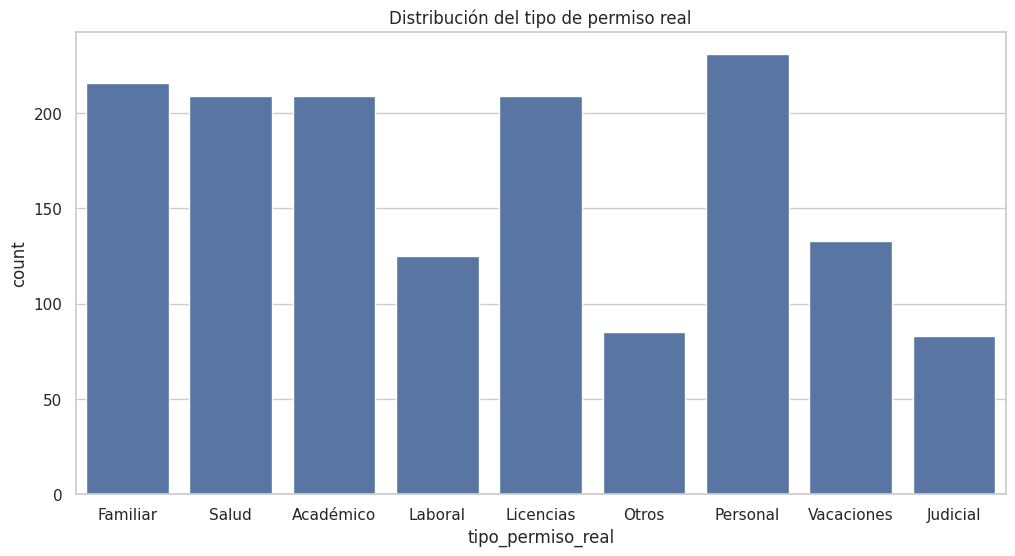

In [24]:
# ============================================================
#
# Paso 6 - Informe del Análisis de datos EDA para cada Modelo
#
# ============================================================

# ============================================================
#      EDA ESPECÍFICO PARA MODELO 1 - Naive Bayes
# ============================================================

print("\n=== EDA PARA MODELO 1 — Naive Bayes (texto → tipo) ===")
print(df[["motivo_texto", "tipo_permiso_real"]].head())
sns.countplot(data=df, x="tipo_permiso_real")
plt.title("Distribución del tipo de permiso real")
plt.show()

# Modelo 2: One-Class SVM

## Contexto del modelo

El **Modelo 2** utiliza un **One-Class SVM** para la **detección de anomalías** en los datos de solicitudes de permisos.  

- **Objetivo:** Identificar solicitudes que se desvían significativamente del comportamiento típico, como permisos excesivamente largos o frecuentes, que podrían requerir revisión especial por RRHH.  
- **Tipo de modelo:** Detección de outliers/anomalías (sin supervisión).  
- **Variables de entrada:**  
  - `dias_solicitados`: número de días solicitados en la solicitud actual.  
  - `dias_ult_ano`: número de días solicitados por el empleado en los últimos 12 meses.  
  - `impacto_area`: indicador sintético del impacto de la ausencia en el área (0–100).  
- **Salida del modelo:** Etiqueta binaria: “normal” vs “anómalo”.

En el contexto del reto **Comfachocó**, esto permite **resaltar solicitudes que podrían afectar la operación del área o indicar un patrón inusual**, facilitando la revisión por parte de RRHH.



=== EDA PARA MODELO 2 — One-Class SVM ===


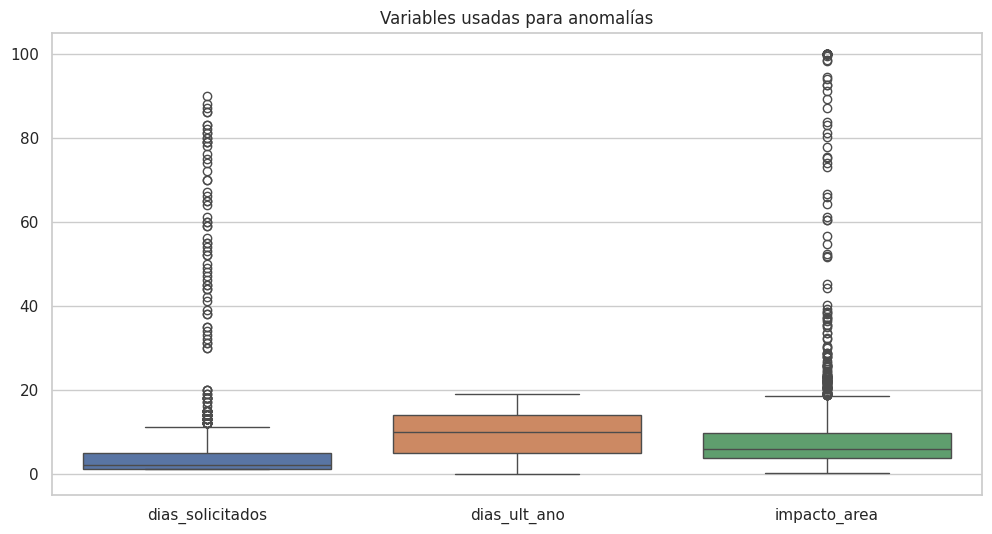

In [26]:
# ============================================================
#      EDA ESPECÍFICO PARA MODELO 2 - One-Class SVM
# ============================================================

print("\n=== EDA PARA MODELO 2 — One-Class SVM ===")
sns.boxplot(data=df[["dias_solicitados","dias_ult_ano","impacto_area"]])
plt.title("Variables usadas para anomalías")
plt.show()

# EDA para Modelo 3: Regresión Lineal

## Contexto del modelo

El **Modelo 3** utiliza **Regresión Lineal** para predecir el **impacto de una solicitud de permiso en el área** (`impacto_area`) a partir del **número de días solicitados** (`dias_solicitados`).  

- **Objetivo:** Estimar cómo la duración de un permiso afecta la operación del área o equipo.  
- **Tipo de modelo:** Regresión supervisada para variable continua.  
- **Variable independiente (X):** `dias_solicitados`  
- **Variable dependiente (Y):** `impacto_area`  
- **Salida del modelo:** Valor continuo que indica el impacto estimado del permiso en el área (0–100).

En el contexto del reto **Comfachocó**, este modelo permite **anticipar el efecto de una solicitud en la carga operativa del área**, facilitando decisiones de planificación o aprobación por parte de RRHH.


=== EDA PARA MODELO 3 — Regresión Lineal ===


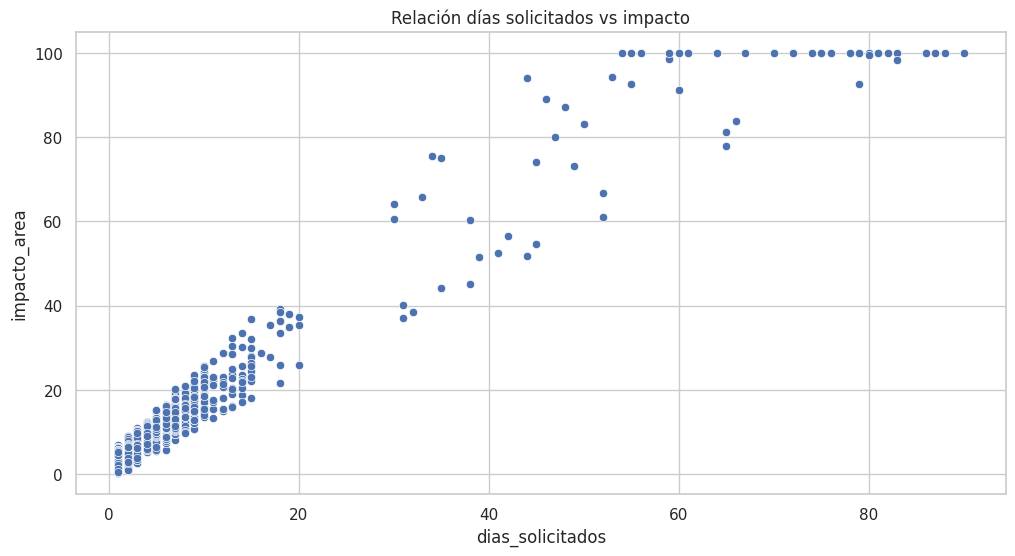

In [27]:
# ============================================================
#      EDA ESPECÍFICO PARA MODELO 3 - Regresión lineal
# ============================================================

print("\n=== EDA PARA MODELO 3 — Regresión Lineal ===")
sns.scatterplot(data=df, x="dias_solicitados", y="impacto_area")
plt.title("Relación días solicitados vs impacto")
plt.show()


# EDA para Modelo 4: Regresión Logística

## Contexto del modelo

El **Modelo 4** utiliza **Regresión Logística** para predecir el **resultado de la solicitud** (`resultado_rrhh`) a partir de características de la solicitud y del empleado.  

- **Objetivo:** Estimar la probabilidad de que una solicitud sea **Aprobada, Rechazada o Revisar** según los datos disponibles.  
- **Tipo de modelo:** Clasificación supervisada multiclase.  
- **Variable dependiente (Y):** `resultado_rrhh`  
- **Variables independientes (X):** pueden incluir `dias_solicitados`, `dias_ult_ano`, `impacto_area`, `area`, `tipo_permiso_real`, entre otras.  
- **Salida del modelo:** Probabilidades para cada clase de resultado, luego convertidas en la clase más probable.

En el contexto del reto **Comfachocó**, este modelo permite **anticipar la decisión de RRHH** sobre una solicitud, ayudando a optimizar tiempos y flujos de aprobación.


=== EDA PARA MODELO 4 — Regresión Logística ===


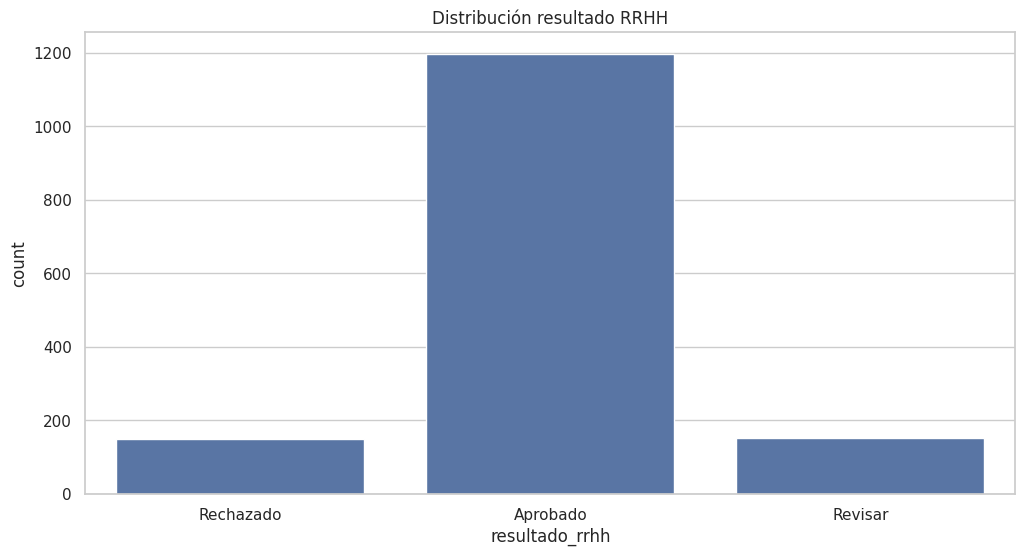

In [28]:
# ============================================================
#      EDA ESPECÍFICO PARA MODELO 4 - Regresión logística
# ============================================================

print("\n=== EDA PARA MODELO 4 — Regresión Logística ===")
sns.countplot(data=df, x="resultado_rrhh")
plt.title("Distribución resultado RRHH")
plt.show()

# EDA para Modelo 5: Árbol de decisión

## Contexto del modelo

El **Modelo 5** utiliza un **Árbol de Decisión** para predecir el **resultado de la solicitud de permiso** (`resultado_rrhh`) basado en múltiples variables del empleado y de la solicitud.  

- **Objetivo:** Clasificar la solicitud como **Aprobada, Rechazada o Revisar**, permitiendo a RRHH tomar decisiones rápidas y consistentes.  
- **Tipo de modelo:** Clasificación supervisada.  
- **Variables independientes (X):** pueden incluir `dias_solicitados`, `dias_ult_ano`, `impacto_area`, `area`, `tipo_permiso_real`, `edad`, `antiguedad_anios`, etc.  
- **Variable dependiente (Y):** `resultado_rrhh`  
- **Salida del modelo:** Predicción de la clase final del resultado.

En el contexto del reto **Comfachocó**, el árbol de decisión permite **visualizar reglas claras y entendibles** que guían la aprobación o revisión de permisos, siendo útil tanto para el modelo como para la interpretación humana.


=== EDA PARA MODELO 5 — Árbol de decisión ===


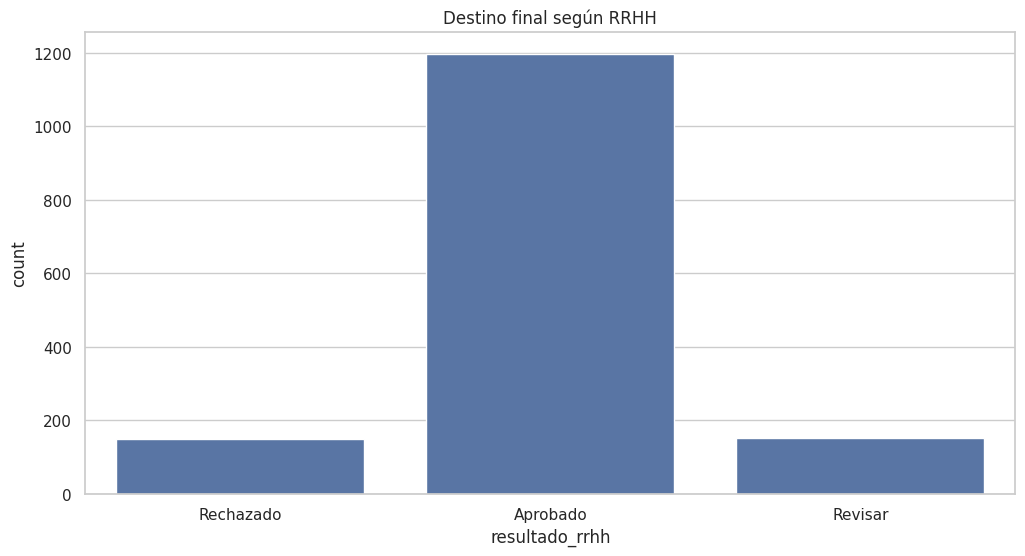

In [29]:
# ============================================================
#      EDA ESPECÍFICO PARA MODELO 5 - Árbol de decisión
# ============================================================

print("\n=== EDA PARA MODELO 5 — Árbol de decisión ===")
sns.countplot(data=df, x="resultado_rrhh")
plt.title("Destino final según RRHH")
plt.show()

# EDA para Modelo 6: KMeans

## Contexto del modelo

El **Modelo 6** utiliza **KMeans** para **segmentar empleados** según patrones de uso o características laborales.  

- **Objetivo:** Identificar grupos homogéneos de empleados que compartan características similares, como edad y antigüedad, lo que permite personalizar políticas de permisos, vacaciones o planes de desarrollo.  
- **Tipo de modelo:** Clustering no supervisado.  
- **Variables de entrada (X):**  
  - `edad`  
  - `antiguedad_anios`  
  - Opcionalmente se pueden incluir otras variables numéricas relevantes para segmentación.  
- **Salida del modelo:** Etiqueta de cluster para cada empleado.

En el contexto del reto **Comfachocó**, KMeans permite **detectar patrones de comportamiento** entre los empleados y analizar cómo ciertas características influyen en la gestión de permisos o ausencias.


=== EDA PARA MODELO 6 — KMeans ===


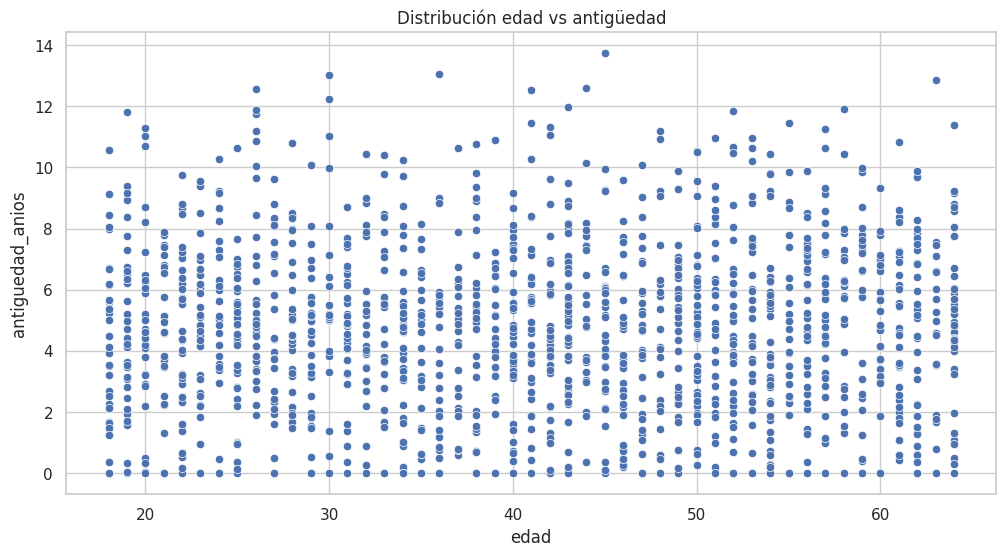

In [30]:
# ============================================================
#      EDA ESPECÍFICO PARA MODELO 6 - KMeans
# ============================================================

print("\n=== EDA PARA MODELO 6 — KMeans ===")
sns.scatterplot(data=df, x="edad", y="antiguedad_anios")
plt.title("Distribución edad vs antigüedad")
plt.show()

# EDA para Modelo 7: KNN

## Contexto del modelo

El **Modelo 7** utiliza **K-Nearest Neighbors (KNN)** para **recomendar acciones o predecir resultados** en función de la similitud entre empleados o solicitudes previas.  

- **Objetivo:** Estimar patrones de comportamiento, como si un empleado debería **reintentar una solicitud** o predecir resultados basados en datos históricos de empleados similares.  
- **Tipo de modelo:** Supervisado, basado en vecinos más cercanos.  
- **Variables de entrada (X):**  
  - `dias_ult_ano` (días usados en el último año)  
  - `dias_solicitados` (días solicitados en la nueva solicitud)  
  - Pueden incluirse otras variables de contexto para medir similitud.  
- **Salida del modelo:** Predicción de clase o valor continuo según la tarea.

En el contexto del reto **Comfachocó**, KNN permite **analizar patrones de solicitudes pasadas** y generar recomendaciones para RRHH o empleados, mejorando la autogestión.


=== EDA PARA MODELO 7 — KNN ===


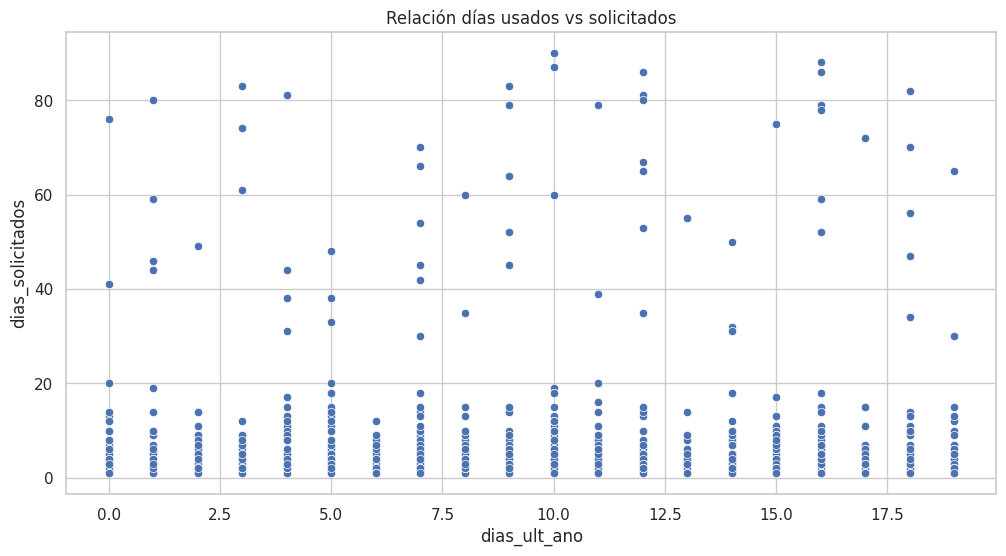

In [32]:
# ============================================================
#      EDA ESPECÍFICO PARA MODELO 7 - KNN
# ============================================================

print("\n=== EDA PARA MODELO 7 — KNN ===")
sns.scatterplot(data=df, x="dias_ult_ano", y="dias_solicitados")
plt.title("Relación días usados vs solicitados")
plt.show()

# Paso 7 - Entrenamiento de Modelos

En este paso se entrenan los modelos generados en pasos anteriores utilizando el **dataset completo de empleados y solicitudes**.

---

## Modelo 1 — Naive Bayes (texto → tipo)

**Objetivo:** Clasificar automáticamente el tipo de permiso (`tipo_permiso_real`) a partir del texto del motivo de la solicitud (`motivo_texto`). Esto agiliza la gestión de solicitudes por parte de RRHH.

**Datos utilizados:**  
- Entrada: texto de la solicitud (`motivo_texto`) transformado a vectores con `CountVectorizer`.  
- Salida: categoría del permiso (`tipo_permiso_real`).

**Consideraciones del modelo:**  
- Se asume independencia entre palabras (supuesto de Naive Bayes).  
- Es adecuado para texto corto y categorías discretas.  

**Resultado esperado:**  
- Modelo entrenado listo para clasificar nuevas solicitudes.  
- Vectorizador que transforma texto a vectores para predicción futura.  

**Notas de reproducibilidad:**  
- Semilla aleatoria definida para consistencia.  
- Modelos y vectorizador guardados para uso posterior sin volver a entrenar.


In [34]:
# ============================================================
#
#               Paso 7 - Entrenamiento de Modelos
#
# ============================================================

# ---------------------------------------
# MODELO 1 — Naive Bayes (texto → tipo)
# ---------------------------------------
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(df["motivo_texto"])
y_tipo = df["tipo_permiso_real"]

nb_model = MultinomialNB()
nb_model.fit(X_text, y_tipo)

joblib.dump(nb_model, "modelo_nb.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")
print("✔ Modelo 1 listo")

✔ Modelo 1 listo


## Modelo 2 — One-Class SVM (detección de anomalías)

**Objetivo:**  
Entrenar un modelo **One-Class SVM** para identificar solicitudes de permisos que se comportan de manera atípica respecto al patrón normal de los empleados. Esto permite detectar automáticamente solicitudes que podrían requerir revisión especial por RRHH.

**Datos utilizados:**  
- Variables de entrada:
  - `dias_solicitados`: número de días solicitados en la solicitud actual.  
  - `dias_ult_ano`: días utilizados por el empleado en los últimos 12 meses.  
  - `impacto_area`: indicador sintético del impacto de la ausencia en el área (0–100).  
- No se requiere variable de salida, ya que es un modelo **no supervisado**.

**Consideraciones del modelo:**  
- One-Class SVM se centra en aprender el **patrón “normal”** de los datos y detectar desviaciones (outliers).  
- El parámetro `nu` controla la fracción de outliers esperados en el entrenamiento.  
- Es sensible a la escala de las variables, por lo que normalmente se recomienda estandarizar o normalizar los datos.

**Resultado esperado:**  
- Modelo entrenado capaz de clasificar nuevas solicitudes como **normales o atípicas**.  
- Permite alertar a RRHH sobre permisos que podrían impactar de manera significativa en la operación del área.

**Notas de reproducibilidad:**  
- Semilla aleatoria definida para consistencia.  
- Modelo guardado (`joblib.dump`) para uso posterior sin volver a entrenar.

In [35]:
# ---------------------------------------
# MODELO 2 — One-Class SVM (anomalías)
# ---------------------------------------
X_svm = df[["dias_solicitados","dias_ult_ano","impacto_area"]]

svm_model = OneClassSVM(kernel="rbf", nu=0.05)
svm_model.fit(X_svm)

joblib.dump(svm_model, "modelo_svm.pkl")
print("✔ Modelo 2 listo")

✔ Modelo 2 listo


## Modelo 3 — Regresión Lineal (impacto en área)

**Objetivo:**  
Entrenar un modelo de **Regresión Lineal** para predecir el **impacto de una solicitud de permiso en el área** (`impacto_area`) a partir de variables relacionadas con el empleado y la solicitud.  
Esto permite estimar cómo la duración de un permiso y otros factores afectan la operación del área.

**Datos utilizados:**  
- Variables independientes (X):
  - `dias_solicitados`: días solicitados en la solicitud actual.  
  - `dias_ult_ano`: días utilizados por el empleado en el último año.  
  - `antiguedad_anios`: años de antigüedad del empleado en el área.  
- Variable dependiente (y):
  - `impacto_area`: indicador sintético del impacto de la ausencia en el área (0–100).

**Consideraciones del modelo:**  
- La relación entre las variables independientes y el impacto debe ser aproximadamente lineal.  
- La dispersión de los datos se analiza previamente en el EDA para validar esta suposición.  
- Permite cuantificar el efecto de cada variable en el impacto, útil para decisiones de planificación.

**Resultado esperado:**  
- Modelo entrenado que puede predecir el impacto de nuevas solicitudes de manera continua.  
- Coeficientes interpretables que indican cómo cada variable influye en el impacto estimado.

**Notas de reproducibilidad:**  
- Semilla aleatoria definida en pasos anteriores asegura consistencia en los cálculos.  
- Modelo guardado (`joblib.dump`) para uso posterior sin volver a entrenar.

In [36]:
# ---------------------------------------
# MODELO 3 — Regresión Lineal (impacto)
# ---------------------------------------
X_reg = df[["dias_solicitados","dias_ult_ano","antiguedad_anios"]]
y_reg = df["impacto_area"]

reg_model = LinearRegression()
reg_model.fit(X_reg, y_reg)

joblib.dump(reg_model, "modelo_regresion.pkl")
print("✔ Modelo 3 listo")

✔ Modelo 3 listo


## Modelo 4 — Regresión Logística (resultado RRHH)

**Objetivo:**  
Entrenar un modelo de **Regresión Logística** para predecir la **probabilidad de cada resultado de solicitud** (`resultado_rrhh`), que puede ser **Aprobado, Rechazado o Revisar**.  
Esto ayuda a anticipar decisiones de RRHH y automatizar la evaluación de solicitudes.

**Datos utilizados:**  
- Variables independientes (X):
  - `impacto_area`: indicador sintético del impacto de la ausencia en el área.  
  - `dias_solicitados`: días solicitados en la solicitud actual.  
  - `antiguedad_anios`: años de antigüedad del empleado en el área.  
- Variable dependiente (y):
  - `resultado_rrhh`: codificada como variable numérica mediante `LabelEncoder`.

**Consideraciones del modelo:**  
- Se trata de un modelo de **clasificación supervisada multiclase**.  
- La salida son probabilidades para cada clase, y la predicción final corresponde a la clase con mayor probabilidad.  
- Es sensible a desbalance de clases, por lo que es importante evaluar métricas como precisión, recall o F1-score.

**Resultado esperado:**  
- Modelo entrenado capaz de predecir la probabilidad de aprobación, rechazo o revisión para nuevas solicitudes.  
- Codificador (`LabelEncoder`) guardado para mapear entre clases numéricas y etiquetas originales.

**Notas de reproducibilidad:**  
- Semilla aleatoria definida asegura consistencia en los entrenamientos.  
- Modelo y codificador guardados (`joblib.dump`) para uso posterior sin volver a entrenar.

In [37]:
# ---------------------------------------
# MODELO 4 — Regresión Logística
# ---------------------------------------

le_rrhh = LabelEncoder()
y_log = le_rrhh.fit_transform(df["resultado_rrhh"])

X_log = df[["impacto_area","dias_solicitados","antiguedad_anios"]]

log_model = LogisticRegression(max_iter=500)
log_model.fit(X_log, y_log)

joblib.dump(log_model, "modelo_log.pkl")
joblib.dump(le_rrhh, "label_rrhh.pkl")
print("✔ Modelo 4 listo")

✔ Modelo 4 listo


## Modelo 5 — Árbol de Decisión (resultado RRHH)

**Objetivo:**  
Entrenar un **Árbol de Decisión** para predecir el **resultado de la solicitud** (`resultado_rrhh`) en función de variables del empleado y la solicitud.  
El modelo genera reglas claras que permiten entender qué factores influyen en la aprobación, rechazo o revisión de una solicitud.

**Datos utilizados:**  
- Variables independientes (X):
  - `impacto_area`: indicador del impacto de la ausencia en el área.  
  - `dias_solicitados`: días solicitados en la solicitud actual.  
  - `antiguedad_anios`: años de antigüedad del empleado en el área.  
- Variable dependiente (y):
  - `resultado_rrhh`: codificada como variable numérica mediante `LabelEncoder`.

**Consideraciones del modelo:**  
- Árbol de clasificación supervisado, con límite de profundidad (`max_depth`) para evitar sobreajuste.  
- Permite **visualizar reglas de decisión** de manera interpretable, mostrando cómo cada variable afecta el resultado.  
- Útil para detectar combinaciones de variables que generan decisiones frecuentes de RRHH.

**Resultado esperado:**  
- Modelo entrenado capaz de clasificar nuevas solicitudes según reglas claras y entendibles.  
- Permite generar insights interpretables para RRHH y mejorar procesos de decisión.

**Notas de reproducibilidad:**  
- Semilla aleatoria definida en pasos anteriores asegura consistencia.  
- Modelo guardado (`joblib.dump`) para uso posterior sin volver a entrenar.

In [40]:
# ---------------------------------------
# MODELO 5 — Árbol de decisión
# ---------------------------------------
tree_model = DecisionTreeClassifier(max_depth=6)
tree_model.fit(X_log, y_log)

joblib.dump(tree_model, "modelo_tree.pkl")
print("✔ Modelo 5 listo")

✔ Modelo 5 listo


## Modelo 6 — KMeans (segmentación de empleados)

**Objetivo:**  
Entrenar un modelo **KMeans** para **segmentar empleados** según características laborales, identificando grupos con patrones similares de edad, antigüedad y uso de días.  
Esto permite a RRHH personalizar políticas y estrategias de gestión según los diferentes perfiles de empleados.

**Datos utilizados:**  
- Variables independientes (X):
  - `edad`: edad del empleado.  
  - `antiguedad_anios`: años de antigüedad del empleado en el área.  
  - `dias_ult_ano`: días utilizados por el empleado en el último año.  
- No se requiere variable dependiente, ya que es un **modelo no supervisado**.  
- Las variables se **escalan** previamente con `StandardScaler` para que tengan igual importancia en el cálculo de distancias.

**Consideraciones del modelo:**  
- Se define el número de clusters (`n_clusters=4`) según la estrategia de segmentación deseada.  
- KMeans busca minimizar la **distancia intra-cluster** y maximizar la **diferencia entre clusters**.  
- La interpretación se centra en identificar características comunes dentro de cada grupo de empleados.

**Resultado esperado:**  
- Modelo entrenado capaz de asignar un **cluster a cada empleado**, permitiendo identificar patrones de comportamiento y perfiles similares.  
- Escalador (`StandardScaler`) guardado para transformar nuevos datos antes de la predicción.

**Notas de reproducibilidad:**  
- Semilla aleatoria definida (`random_state=42`) asegura resultados consistentes.  
- Modelo y escalador guardados (`joblib.dump`) para uso posterior sin volver a entrenar.

In [41]:
# ---------------------------------------
# MODELO 6 — K-Means (segmentación)
# ---------------------------------------
X_cluster = df[["edad","antiguedad_anios","dias_ult_ano"]]

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_model.fit(X_cluster_scaled)

joblib.dump(kmeans_model, "modelo_kmeans.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✔ Modelo 6 listo")

✔ Modelo 6 listo


## Modelo 7 — KNN (sugerencia de días de permiso)

**Objetivo:**  
Entrenar un modelo **K-Nearest Neighbors (KNN) regresor** para **sugerir la cantidad de días a solicitar** en función del historial del empleado y características personales.  
Esto permite generar recomendaciones personalizadas para optimizar la planificación de permisos y evitar sobrecarga en el área.

**Datos utilizados:**  
- Variables independientes (X):
  - `dias_ult_ano`: días usados por el empleado en el último año.  
  - `antiguedad_anios`: años de antigüedad del empleado en el área.  
  - `edad`: edad del empleado.  
- Variable dependiente (y):
  - `dias_solicitados`: número de días solicitados en la solicitud actual.

**Consideraciones del modelo:**  
- KNN se basa en la **similitud entre empleados**: la predicción se calcula como la media de los vecinos más cercanos.  
- Número de vecinos (`n_neighbors=5`) ajustado para equilibrar precisión y suavidad en la predicción.  
- Es sensible a la escala de las variables, por lo que normalmente se recomienda estandarizar los datos si hay magnitudes muy distintas.

**Resultado esperado:**  
- Modelo entrenado capaz de sugerir días de permiso para nuevos empleados o solicitudes.  
- Permite apoyar decisiones de planificación de RRHH y mejorar la experiencia del empleado.

**Notas de reproducibilidad:**  
- Semilla aleatoria definida en pasos anteriores asegura consistencia.  
- Modelo guardado (`joblib.dump`) para uso posterior sin volver a entrenar.


In [44]:
# ---------------------------------------
# MODELO 7 — KNN (sugerencia de días)
# ---------------------------------------
X_knn = df[["dias_ult_ano","antiguedad_anios","edad"]]
y_knn = df["dias_solicitados"]

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_knn, y_knn)

joblib.dump(knn_model, "modelo_knn.pkl")
print("✔ Modelo 7 listo")

print("\n🎉 ENTRENAMIENTO COMPLETO: TODOS LOS MODELOS GUARDADOS")

✔ Modelo 7 listo

🎉 ENTRENAMIENTO COMPLETO: TODOS LOS MODELOS GUARDADOS


# Paso 8 — Cargar modelos entrenados

En este paso se cargan todos los **modelos previamente entrenados y guardados** para su uso en predicciones y simulaciones dentro del sistema de autogestión de permisos.

---

## Objetivo

- Recuperar los modelos y objetos asociados (`vectorizer`, `LabelEncoder`, `scaler`) que se entrenaron en el Paso 7.  
- Evitar tener que reentrenar los modelos cada vez que se ejecuta el simulador.  
- Permitir que todas las predicciones y análisis posteriores utilicen **exactamente los mismos modelos entrenados**, asegurando reproducibilidad y consistencia en los resultados.

---

## Modelos cargados

1. **Naive Bayes** — Clasificación de tipo de permiso a partir del texto (`motivo_texto`).  
   - Objeto asociado: `vectorizer` para transformar texto a vectores.  

2. **One-Class SVM** — Detección de solicitudes anómalas.  

3. **Regresión Lineal** — Predicción del impacto de la solicitud en el área (`impacto_area`).  

4. **Regresión Logística** — Clasificación del resultado de la solicitud (`resultado_rrhh`).  
   - Objeto asociado: `LabelEncoder` para mapear clases numéricas a etiquetas originales.  

5. **Árbol de Decisión** — Clasificación interpretativa del resultado de la solicitud.  

6. **KMeans** — Segmentación de empleados según características y patrones de uso.  
   - Objeto asociado: `scaler` para normalizar variables antes de la predicción.  

7. **KNN** — Sugerencia de cantidad de días a solicitar basada en historial y similitud entre empleados.  

---

## Beneficios de este paso

- Permite **simular escenarios y hacer predicciones** sin tener que entrenar nuevamente los modelos.  
- Asegura **consistencia de resultados** entre ejecuciones.  
- Facilita la integración de los modelos en sistemas de autogestión de permisos de RRHH.


In [46]:
# ============================================================
#
#               Paso 8 - Cargar modelos entrenados
#
# ============================================================

print("=== SIMULADOR DE PERMISOS — COMFACHOCO ===\n")

# ------------------------------------------------------------
# 1. CARGAR MODELOS ENTRENADOS
# ------------------------------------------------------------

nb_model = joblib.load("modelo_nb.pkl")
vectorizer = joblib.load("vectorizer.pkl")

svm_model = joblib.load("modelo_svm.pkl")
reg_model = joblib.load("modelo_regresion.pkl")

log_model = joblib.load("modelo_log.pkl")
le_rrhh = joblib.load("label_rrhh.pkl")

tree_model = joblib.load("modelo_tree.pkl")
kmeans_model = joblib.load("modelo_kmeans.pkl")

scaler = joblib.load("scaler.pkl")
knn_model = joblib.load("modelo_knn.pkl")

print("✔ Modelos cargados correctamente\n")


=== SIMULADOR DE PERMISOS — COMFACHOCO ===

✔ Modelos cargados correctamente



In [47]:
# ------------------------------------------------------------
# 2. Solicitar datos al usuario
# ------------------------------------------------------------
print("=== INGRESO DE DATOS DEL EMPLEADO ===")

motivo_usuario = input("Motivo del permiso (texto libre): ")

edad = int(input("Edad del empleado: "))
antiguedad_anios = float(input("Años de antigüedad: "))
dias_ult_ano = int(input("Días usados en el último año: "))
dias_solicitados = int(input("Días que está solicitando: "))

area_usuario = input("Ingrese el área (Administrativa / Operativa / Comercial / Financiera / Tecnologia / Talento Humano): ")


# ============================================================
#   3. MODELO 1 — CLASIFICACIÓN DEL MOTIVO (Naive Bayes)
# ============================================================

motivo_vect = vectorizer.transform([motivo_usuario])
tipo_predicho = nb_model.predict(motivo_vect)[0]

print(f"\n✔ Tipo de permiso detectado por IA: {tipo_predicho}")


# ============================================================
#   4. VALIDACIONES MANUALES BÁSICAS
#   Si hay algo imposible/ilegal → FIN
# ============================================================

if dias_solicitados < 0:
    print("\n❌ Error: Los días solicitados no pueden ser negativos.")
    exit()

if dias_solicitados > 90:
    print("\n❌ Error: Solicitud supera el máximo legal permitido.")
    exit()

print("✔ Validaciones legales básicas superadas")


# ============================================================
#   5. MODELO 2 — DETECCIÓN DE ANOMALÍAS (SVM)
# ============================================================

X_svm = np.array([[dias_solicitados, dias_ult_ano, antiguedad_anios]])
anomalia = svm_model.predict(X_svm)[0]   # 1 = normal, -1 = anómala

if anomalia == -1:
    print("\n⚠️ Advertencia: Solicitud anómala")
else:
    print("\n✔ Solicitud normal")


# ============================================================
#   6. MODELO 3 — REGRESIÓN LINEAL (Impacto estimado)
# ============================================================

X_reg = np.array([[dias_solicitados, dias_ult_ano, antiguedad_anios]])
impacto_estimado = reg_model.predict(X_reg)[0]

print(f"✔ Impacto estimado sobre el área: {impacto_estimado:.2f}")


# ============================================================
#   7. MODELO 4 — REGRESIÓN LOGÍSTICA (Probabilidad de aprobación)
# ============================================================

X_log = np.array([[impacto_estimado, dias_solicitados, antiguedad_anios]])
prob = log_model.predict_proba(X_log)[0]

prob_aprob = prob[ le_rrhh.transform(["Aprobado"])[0] ]
prob_recha = prob[ le_rrhh.transform(["Rechazado"])[0] ]
prob_revis = prob[ le_rrhh.transform(["Revisar"])[0] ]

print("\n=== Probabilidades:")
print(f" Aprobado:  {prob_aprob:.2%}")
print(f" Rechazado: {prob_recha:.2%}")
print(f" Revisar:   {prob_revis:.2%}")


# ============================================================
#   8. MODELO 5 — ÁRBOL DE DECISIÓN (Decisión final)
# ============================================================

decision_final = tree_model.predict(X_log)[0]
decision_final_label = le_rrhh.inverse_transform([decision_final])[0]

print(f"\n✔ Decisión automática del modelo: {decision_final_label}")


# ============================================================
#   9. MODELO 6 — KMEANS (Segmento del empleado)
# ============================================================

X_cluster = np.array([[edad, antiguedad_anios, dias_ult_ano]])
X_cluster_scaled = scaler.transform(X_cluster)

cluster = kmeans_model.predict(X_cluster_scaled)[0]

print(f"✔ Segmento del empleado (K-Means): Grupo {cluster}")


# ============================================================
#   10. MODELO 7 — KNN (Sugerencia de días)
# ============================================================

X_knn = np.array([[dias_ult_ano, antiguedad_anios, edad]])
sugerencia_dias = knn_model.predict(X_knn)[0]

print(f"✔ Sugerencia IA de días para este perfil: {sugerencia_dias:.1f}")


# ============================================================
#   11. RESUMEN FINAL DEL FLUJO
# ============================================================

print("\n=================================")
print("     📄 RESUMEN COMPLETO IA")
print("=================================")

print(f"🔹 Motivo ingresado: {motivo_usuario}")
print(f"🔹 Tipo detectado por IA: {tipo_predicho}")
print(f"🔹 Impacto estimado: {impacto_estimado:.2f}")
print(f"🔹 Probabilidad de aprobación: {prob_aprob:.1%}")
print(f"🔹 Decisión final IA: {decision_final_label}")
print(f"🔹 Segmento empleado: {cluster}")
print(f"🔹 Sugerencia IA días: {sugerencia_dias:.1f}")

print("\n🎉 FIN DEL SIMULADOR — Gracias por usar MITIEMPO COMFACHOCO")


=== INGRESO DE DATOS DEL EMPLEADO ===
Motivo del permiso (texto libre): gato
Edad del empleado: 51
Años de antigüedad: 10
Días usados en el último año: 56
Días que está solicitando: 15
Ingrese el área (Administrativa / Operativa / Comercial / Financiera / Tecnologia / Talento Humano): comercial

✔ Tipo de permiso detectado por IA: Personal
✔ Validaciones legales básicas superadas

⚠️ Advertencia: Solicitud anómala
✔ Impacto estimado sobre el área: 33.69

=== Probabilidades:
 Aprobado:  73.58%
 Rechazado: 12.30%
 Revisar:   14.12%

✔ Decisión automática del modelo: Aprobado
✔ Segmento del empleado (K-Means): Grupo 0
✔ Sugerencia IA de días para este perfil: 2.6

     📄 RESUMEN COMPLETO IA
🔹 Motivo ingresado: gato
🔹 Tipo detectado por IA: Personal
🔹 Impacto estimado: 33.69
🔹 Probabilidad de aprobación: 73.6%
🔹 Decisión final IA: Aprobado
🔹 Segmento empleado: 0
🔹 Sugerencia IA días: 2.6

🎉 FIN DEL SIMULADOR — Gracias por usar COMFACHOCO IA


In [ ]:
# Diagnóstico de scores bajos (< 80%) y mejora de modelos
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Cargar datos desde SQL (o CSV si está disponible)
import pyodbc
import os
DB_SERVER = os.getenv('DB_SERVER','localhost')
DB_PORT = os.getenv('DB_PORT','1433')
DB_NAME = os.getenv('DB_NAME','ComfachocoLeaveDB')
DB_USER = os.getenv('DB_USER','sa')
DB_PASSWORD = os.getenv('DB_PASSWORD','Jdsuarez23')
conn = pyodbc.connect(f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={DB_SERVER},{DB_PORT};DATABASE={DB_NAME};UID={DB_USER};PWD={DB_PASSWORD}")
df = pd.read_sql("SELECT * FROM solicitudes_permiso", conn)
conn.close()

# Filtrar registros con etiqueta (AUTORIZADO/RECHAZADO) para entrenamiento
df_train = df[df['resultado_rrhh'].isin(['AUTORIZADO','RECHAZADO'])].copy()

# Feature engineering (impacto y variables relevantes)
def compute_impacto(row):
    # Fórmula mejorada de impacto: pondera días, último año y antigüedad
    return np.clip(row['dias_solicitados']*1.9 + row['dias_ult_ano']*0.3 - row['antiguedad_anios']*0.2, 0, 100)

df_train['impacto_area_calc'] = df_train.apply(compute_impacto, axis=1)
df_train['texto_largo'] = df_train['motivo_texto'].fillna('').str.len()
df_train['anomala_bin'] = (df_train['es_anomala']==1).astype(int)
df_train['vacaciones_bin'] = (df_train['tipo_permiso_real']=='VACACIONES').astype(int)
df_train['enfermedad_bin'] = (df_train['tipo_permiso_real']=='ENFERMEDAD').astype(int)

features = ['impacto_area_calc','dias_solicitados','antiguedad_anios','dias_ult_ano','texto_largo','anomala_bin','vacaciones_bin','enfermedad_bin']
X = df_train[features].copy()
y = (df_train['resultado_rrhh']=='AUTORIZADO').astype(int)

# Train/val split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Pipeline: imputación + escalado + LogReg con class_weight + calibración
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
preprocess = ColumnTransformer([('num', num_pipeline, features)])
logreg = LogisticRegression(max_iter=2000, class_weight='balanced')
calibrated = CalibratedClassifierCV(base_estimator=logreg, method='sigmoid', cv=3)
model = Pipeline([('prep', preprocess), ('clf', calibrated)])

model.fit(X_train, y_train)
proba_test = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, proba_test)
print('ROC AUC:', auc)
print(classification_report(y_test, (proba_test>=0.5).astype(int)))

# Análisis de distribución de probabilidad:
plt.figure(figsize=(6,4))
plt.hist(proba_test, bins=30, color='seagreen', alpha=0.8)
plt.title('Distribución de probabilidad de aprobación')
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.show()

# Inspección de casos de alta probabilidad (>0.8)
high_idx = np.where(proba_test>=0.8)[0]
print('Casos >80%:', len(high_idx))

# Guardado del modelo (opcional)
import joblib
joblib.dump(model, 'trained_models/modelo_log_calibrado.pkl')
print('Modelo calibrado guardado en trained_models/modelo_log_calibrado.pkl')